# Izhikevich model

We will show you the example of the usage of the izhikevich model. For more details, please check the [tutorial](https://brainpy-models.readthedocs.io/en/latest/tutorials/neurons/Izhikevich_model.html).

Let's start by importing the packages.

In [1]:
import matplotlib.pyplot as plt
import brainpy as bp
import numpy as np
import bpmodels

bp.profile.set(jit=True, merge_steps=True)

We can get the izhikevich model with ``bpmodels.neurons.get_Izhikevich()``.

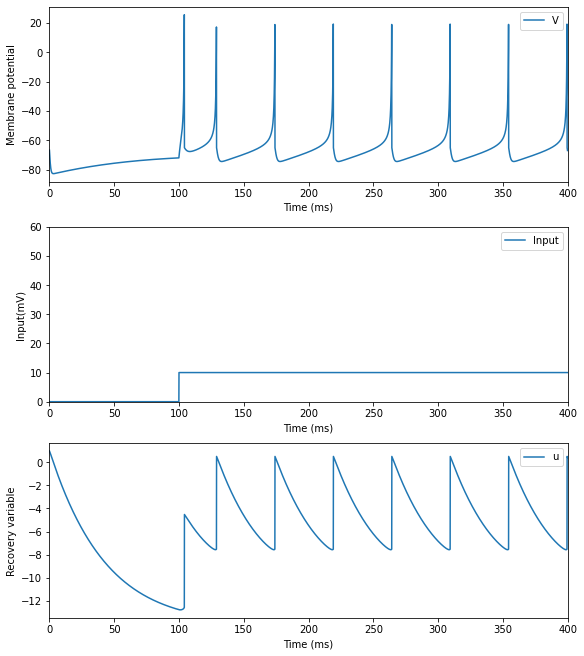

In [6]:
Izhikevich = bpmodels.neurons.get_Izhikevich()
neu = bp.NeuGroup(Izhikevich, 10, monitors=['V', 'u'])
neu.pars['noise'] = 0.

current2 = bp.inputs.ramp_current(10, 10, 300, 0, 300)
current1 = np.zeros(int(np.ceil(100 / 0.1)))
current = np.append(current1, current2)
neu.run(duration=400., inputs=['input', current], report=False)

fig, gs = bp.visualize.get_figure(3, 1, 3, 8)

fig.add_subplot(gs[0, 0])
plt.plot(neu.mon.ts, neu.mon.V[:, 0], label='V')
plt.ylabel('Membrane potential')
plt.xlim(-0.1, 400.1)
plt.xlabel('Time (ms)')
plt.legend()

fig.add_subplot(gs[1, 0])
plt.plot(neu.mon.ts, current, label='Input')
plt.xlim(-0.1, 400.1)
plt.ylim(0, 60)
plt.ylabel('Input(mV)')
plt.xlabel('Time (ms)')
plt.legend()

fig.add_subplot(gs[2, 0])
plt.plot(neu.mon.ts, neu.mon.u[:, 0], label='u')
plt.xlim(-0.1, 400.1)
plt.ylabel('Recovery variable')
plt.xlabel('Time (ms)')
plt.legend()
plt.show()

The pre-defined izhikevich model provides many different firing types, so we can use ``type='tonic spiking'`` to get a pre-defined model with tonic spiking parameters.

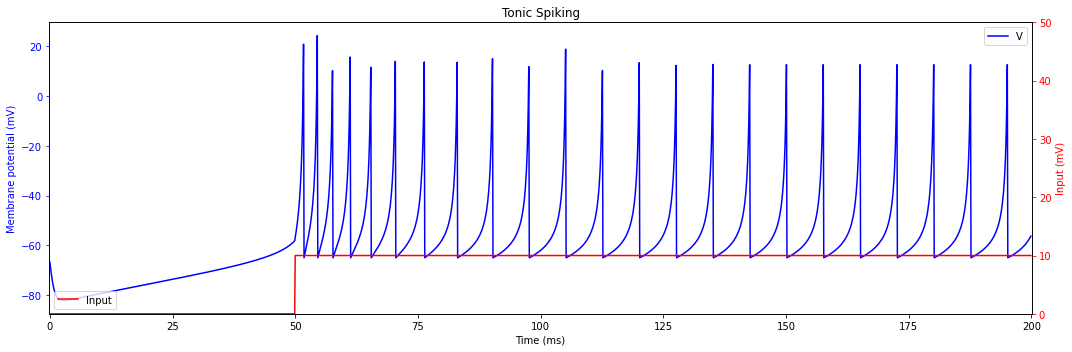

In [8]:
Izhikevich = bpmodels.neurons.get_Izhikevich(type='tonic spiking')
neu = bp.NeuGroup(Izhikevich, 10, monitors=['V', 'u'])
neu.pars['noise'] = 0.
current2 = bp.inputs.ramp_current(10, 10, 150, 0, 150)
current1 = np.zeros(int(np.ceil(50 / 0.1)))
current = np.append(current1, current2)
neu.run(duration=200., inputs=['input', current], report=False)

fig, ax1 = plt.subplots(figsize=(15, 5))
plt.title('Tonic Spiking')
ax1.plot(neu.mon.ts, neu.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, 200.1)
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(neu.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(0, 50)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()
plt.show()